In [85]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, LeaveOneOut, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

In [2]:
data_source = 'C:/Users/BiSBII/Documents/MM_ML/data/'

In [8]:
rnaseq = pd.read_csv(os.path.join(data_source, 'GREAT_LOG_TPM_GSE98923_MODEL_GENES_NOREPS.csv'), index_col=0)
rnaseq = rnaseq.transpose()
rnaseq.shape

(73, 6018)

In [20]:
metadata = pd.read_excel(os.path.join(data_source, 'GSE98923_metadata.xlsx'), index_col=0, sheet_name='NO_REPLICATES')
y_state = metadata['state'][rnaseq.index]
y_state

CS_time0_2012      green
CS_time1_2012      green
CS_time2_2012      green
CS_time3_2012      green
CS_time4_2012      green
                   ...  
PN_time7_2014     mature
PN_time8_2014     mature
PN_time9_2014     mature
PN_time10_2014    mature
PN_time11_2014    mature
Name: state, Length: 73, dtype: object

In [21]:
data_mets = pd.read_excel(os.path.join(data_source, 'metabolomics.xlsx'), index_col=0, header=1)
data_mets = data_mets.loc[:, data_mets.columns != 'Method']
data_mets.shape

(212, 219)

In [22]:
data_mets = data_mets.transpose()

In [23]:
metadata_mets_conv = pd.read_excel(os.path.join(data_source, 'metabolomics_metadata.xlsx'), sheet_name='CONVERSION', index_col=0)

In [24]:
data_mets_noreps = data_mets.groupby(metadata_mets_conv['groups']).mean()
data_mets_noreps

Metabolite Name,xylose,xylonic acid,vanillic acid,valine,urea,uracil,UDP-glucuronic acid,tyrosol,tyrosine,tryptophan,...,proline,quercetin-3-glucoside,quercetin-3-glucuronide,resveratrol,resveratrol dimer (pallidol or viniferin),spirotetramat,splitomicin,taxifolin,tributyl phosphate,tyrosine
groups,,,,,,,,,,,,,,,,,,,,,
CS_time0_2012,3.731010,0.286863,0.117069,1.730116,1.216265,0.086685,0.650581,0.110813,1.387846,4.603217,...,98.838524,0.923180,20.703345,0.000318,0.000000,10.575021,0.000000,0.000000,75.369803,0.140542
CS_time0_2013,3.248436,0.571939,0.219839,0.758713,1.244861,0.202860,1.277033,0.256479,1.069705,1.967828,...,1040.845728,12.307100,77.785800,1.187485,0.000000,38.528039,0.000000,0.029844,0.000000,0.000000
CS_time0_2014,2.293119,0.529937,0.495085,1.361930,1.078642,0.563003,1.026810,0.618409,0.858803,1.293119,...,138.256017,6.642696,60.868062,1.184399,0.262894,0.000000,0.000000,0.880047,0.000000,0.000000
CS_time10_2012,1.701519,0.908847,0.124218,6.172475,1.798034,0.141197,1.705094,0.134942,56.835567,0.456658,...,210.242434,21.346971,14.397728,0.000000,0.000000,4.236117,0.000000,0.000000,68.386685,0.087802
CS_time10_2013,1.420912,0.709562,0.271671,2.251117,0.851653,0.204647,1.277033,0.285970,1.787310,0.618409,...,5721.521059,131.340072,67.179783,4.141035,0.000000,4.742720,0.000000,6.002407,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PN_time8_2013,1.707775,0.602324,0.257373,4.428061,3.485255,0.255585,1.798928,0.223414,2.071492,1.488829,...,2433.909025,114.427437,113.285199,229.844525,5.813718,2.628640,0.000000,137.692419,0.000000,0.000000
PN_time8_2014,3.496872,0.741734,0.422699,2.621984,0.950849,0.455764,1.350313,0.547811,2.064343,1.639857,...,948.846056,34.157383,41.083211,65.457904,3.085765,0.000000,0.000000,63.440024,0.000000,0.000000
PN_time9_2012,2.193923,0.753351,0.097408,5.401251,1.716711,0.186774,2.283289,0.115282,1.880250,1.210009,...,88.710237,13.866339,27.864049,1.297096,4.812534,2.476580,6.371248,9.098453,14.831962,0.378103


In [26]:
fluxes = pd.read_csv(os.path.join(data_source, 'fluxomics_fc.csv'), index_col=0)
fluxes = fluxes.transpose()
fluxes.shape

(73, 8632)

In [33]:
fluxes = fluxes.fillna(0)

In [34]:
all_data = pd.concat([rnaseq, data_mets_noreps, fluxes], axis=1)
all_data.shape

(73, 14862)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(all_data, y_state, test_size=0.20, random_state=42)

In [40]:
# remove constant features
vt = VarianceThreshold(0.1)
filter_train = vt.fit(X_train)

train_filtered = filter_train.transform(X_train)
test_filtered = filter_train.transform(X_test)

cols_inds = vt.get_support(indices=True)

X_train_filtered = pd.DataFrame(train_filtered, index=X_train.index, columns=X_train.columns[cols_inds])
print(X_train_filtered.shape)

X_test_filtered = pd.DataFrame(test_filtered, index=X_test.index, columns=X_test.columns[cols_inds])
X_test_filtered.shape

(58, 4231)


(15, 4231)

In [43]:
kb2 = SelectKBest(f_classif, k=1000)

kb2_fit = kb2.fit(X_train_filtered, y_train)

train_filtered2 = kb2_fit.transform(X_train_filtered)
test_filtered2 = kb2_fit.transform(X_test_filtered)

cols_inds = kb2_fit.get_support(indices=True)

X_train_filtered2 = pd.DataFrame(train_filtered2, columns=X_train_filtered.columns[cols_inds], index=X_train_filtered.index)
X_train_filtered2.shape

(58, 1000)

In [44]:
X_test_filtered2 = pd.DataFrame(test_filtered2, columns=X_test_filtered.columns[cols_inds], index=X_test_filtered.index)
X_test_filtered2.shape

(15, 1000)

In [46]:
scaler_model = StandardScaler().fit(X_train_filtered2)
X_train_scaled = scaler_model.transform(X_train_filtered2)
X_test_scaled = scaler_model.transform(X_test_filtered2)

In [47]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_filtered2.columns, index=X_train_filtered2.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_filtered2.columns, index=X_test_filtered2.index)

### APLY ML

In [49]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)

y_pred_tree = clf.predict(X_test_scaled_df)

C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [50]:
print('Precision: %0.2f' % precision_score(y_test, y_pred_tree, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, y_pred_tree, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, y_pred_tree))

Precision: 0.94
Recall: 0.93
Accuracy: 0.93


[Text(0.5, 0.75, 'x[64] <= 0.002\ngini = 0.485\nsamples = 58\nvalue = [24, 34]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]')]

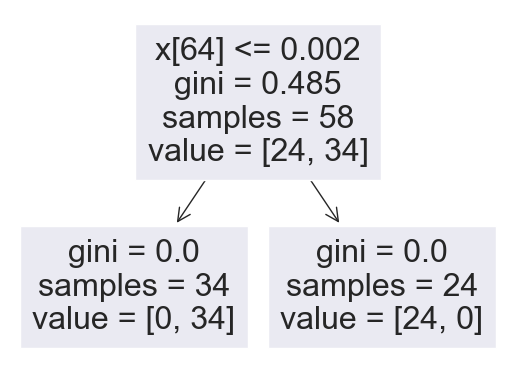

In [51]:
tree.plot_tree(clf)

Precision: 0.94
Recall: 0.93
Accuracy: 0.93


C:\Users\BiSBII\anaconda3\envs\multiomics\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


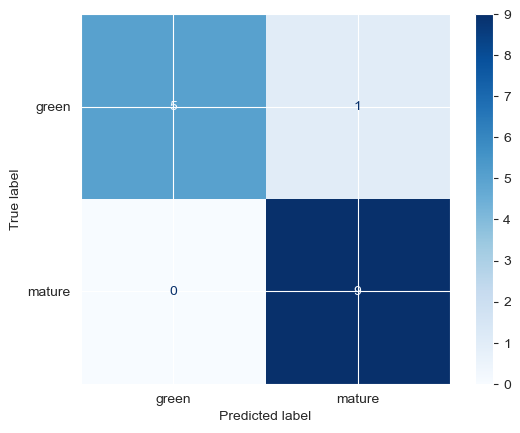

In [54]:
lr = LogisticRegression(random_state=0).fit(X_train_scaled_df, y_train)
y_pred_lr = lr.predict(X_test_scaled_df)

print('Precision: %0.2f' % precision_score(y_test, y_pred_lr, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, y_pred_lr, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, y_pred_lr))

cm_lr = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=lr.classes_, cmap='Blues')

Precision: 0.94
Recall: 0.93
Accuracy: 0.93


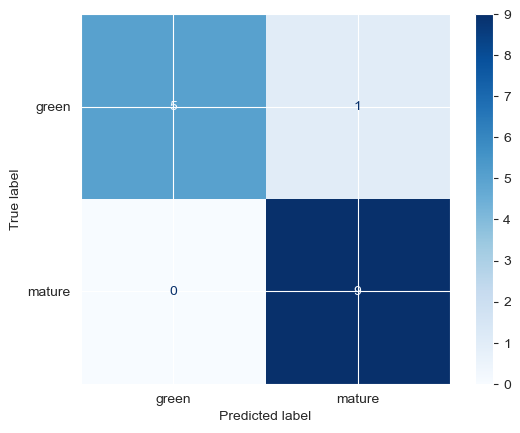

In [56]:
svm_model = svm.SVC()
svm_model.fit(X_train_scaled_df, y_train)

svm_y_pred = svm_model.predict(X_test_scaled_df)

print('Precision: %0.2f' % precision_score(y_test, svm_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, svm_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, svm_y_pred))

svm_cm = ConfusionMatrixDisplay.from_predictions(y_test, svm_y_pred, display_labels=svm_model.classes_, cmap='Blues')
svm_cm

In [57]:
rf_model = RandomForestClassifier(n_estimators=100)

rf_model.fit(X_train_scaled_df, y_train)

rf_y_pred = rf_model.predict(X_test_scaled_df)

print('Precision: %0.2f' % precision_score(y_test, rf_y_pred, average='weighted'))
print('Recall: %0.2f' % recall_score(y_test, rf_y_pred, average='weighted'))
print('Accuracy: %0.2f' % accuracy_score(y_test, rf_y_pred))

Precision: 1.00
Recall: 1.00
Accuracy: 1.00


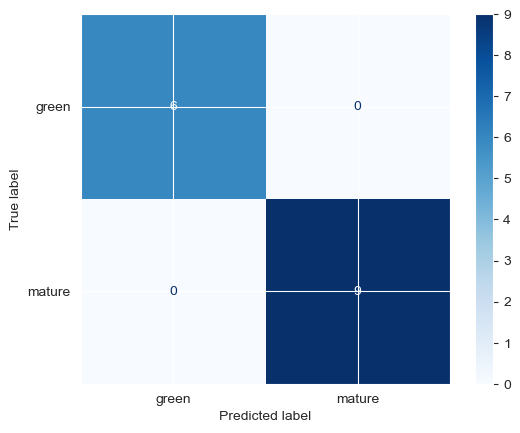

In [58]:
rf_cm = ConfusionMatrixDisplay.from_predictions(y_test, rf_y_pred, display_labels=svm_model.classes_, cmap='Blues')
rf_cm

In [59]:
importances = rf_model.feature_importances_
importances_df = pd.DataFrame(importances, columns=['importance'], index=X_train_scaled_df.columns)
importances_df.sort_values(by=['importance'], ascending=False)

,importance
Vitvi14g00439,0.02
Vitvi18g00068,0.02
Vitvi07g01275,0.02
Vitvi04g00870,0.02
Vitvi01g01748,0.02
...,...
Vitvi10g00436,0.00
Vitvi10g00468,0.00
Vitvi10g00543,0.00
Vitvi10g00740,0.00


# LET's now use LOO and CV

In [61]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [93]:
scaler = StandardScaler()
vt = VarianceThreshold(0.1)
skb = SelectKBest(f_classif, k=1000)
svm_model2 = svm.SVC()

pipe = Pipeline([('transformer1', scaler), ('transformer2', vt), ('transformer3', skb), ('estimator', clf)])

scoring = ['accuracy', 'precision', 'recall']

cv = KFold(n_splits=73)
scores = cross_val_score(pipe, all_data, y_state, cv = cv, scoring='accuracy')
scores.mean()

0.9726027397260274

In [92]:
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1.])